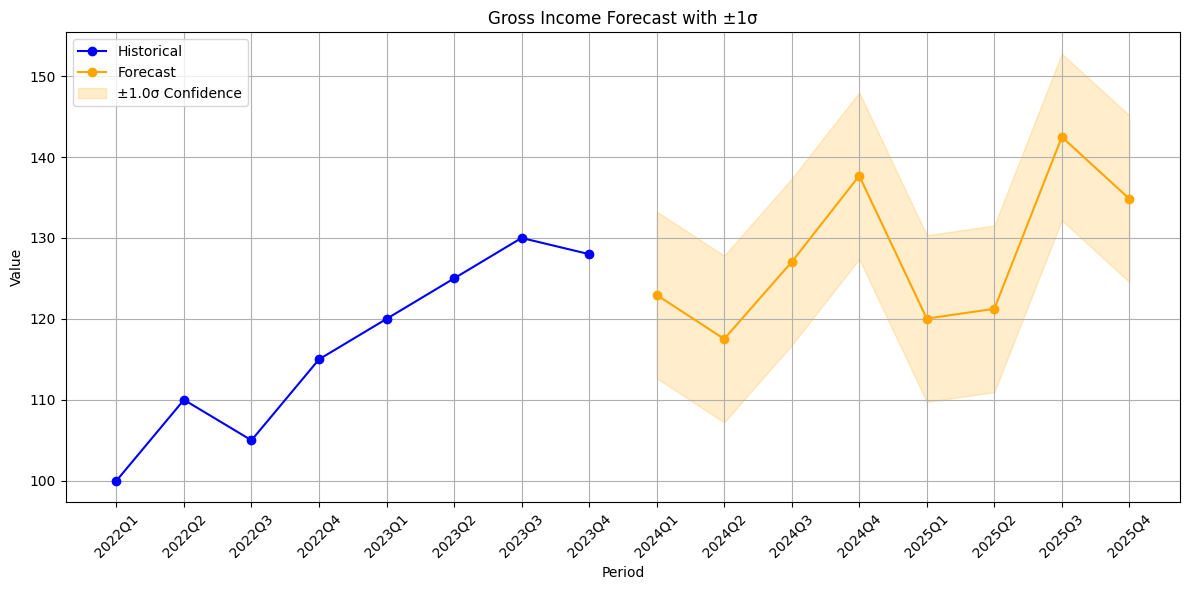

In [1]:
from PyFinModeler import (
    Company, FinancialItem, FinancialItemType,
    AssumptionSet, ForecastRule, ForecastModel,
    ChartGenerator
)

# Step 1: Setup dummy company and historical quarterly data
company = Company(name="TestCo", ticker="TEST", currency="USD")

gross_income = FinancialItem(name="gross_Income", item_type=FinancialItemType.REVENUE)
gross_income.historical = {
    "2022Q1": 100,
    "2022Q2": 110,
    "2022Q3": 105,
    "2022Q4": 115,
    "2023Q1": 120,
    "2023Q2": 125,
    "2023Q3": 130,
    "2023Q4": 128,
}
company.income_statement.add_item(gross_income)

# Step 2: Create forecast model
assumptions = AssumptionSet()
forecast_model = ForecastModel(company=company, assumptions=assumptions, periods=8)

# Step 3: Add statistical forecast rule for quarterly frequency
forecast_model.add_forecast_rule(ForecastRule(
    item_name="gross_Income",
    method="statistical",
    params={
        "mode": "random",              # could also use "mean" or "percentile"
        "frequency": "quarter",
        "trend": 0.01,                 # 1% quarterly growth
        "random_seed": 42
    }
))

# Step 4: Run the forecast
forecast_model.run_forecast()

# Step 5: Visualize forecast
chart = ChartGenerator(company)
chart.plot_forecast_with_confidence(
    item_name="gross_Income",
    std_multiplier=1.0,
    title="Gross Income Forecast with ±1σ"
)